В прикрепленном файле “Test” вы можете найти список доменов с объемами (avails) количества пользователей, которые приходили с соответствующих доменов. Домены могут повторяться.

**Посчитать общее количество пользователей (avails) для каждого уникального домена.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Test.xlsx', header=0)
data.head()

,Media,avails
0,yahoo.com,4603
1,yahoo.com,881
2,cmt.com,862
3,worldofsolitaire.com,858
4,copykat.com,1621


In [3]:
domains = data.groupby('Media', as_index=False)['avails'].sum()
domains.to_csv('domains.csv', sep=';', header=['Media', 'avails'])

**Присвоить каждому уникальному домену случайно сгенерированную стоимость от 5.5  до 13.5 (цена может быть с шагом 0.5).**

In [4]:
values = np.arange(5.5, 13.6, 0.5)
data['values'] = np.array([np.random.choice(values) 
                           for i in range(data.shape[0])])
data.head()

,Media,avails,values
0,yahoo.com,4603,12.5
1,yahoo.com,881,13.5
2,cmt.com,862,11.0
3,worldofsolitaire.com,858,6.5
4,copykat.com,1621,13.5


In [5]:
data['values'] = "" # каждая ячейка в столбце -- пустая
dict_media = {media : np.random.choice(values) 
              for media in data['Media'].unique()}
for i in data.index:
    data.at[i, 'cost'] = dict_media[data.loc[i, 'Media']]
data.head()

,Media,avails,values,cost
0,yahoo.com,4603,,7.0
1,yahoo.com,881,,7.0
2,cmt.com,862,,8.5
3,worldofsolitaire.com,858,,5.5
4,copykat.com,1621,,9.0


**Определить какой стране пренадлежит домен по его хостинг-адресу (если у домена хостинг .com, .net, .tv, .org &mdash; сгруппировать их в Worldwide).**

In [6]:
countries = pd.read_excel('Additional Information.xlsx', header=0)
countries.head()

,ISO code,country
0,AM,Armenia
1,AZ,Azerbaijan
2,BY,Belarus
3,KZ,Kazakhstan
4,KG,Kyrgyzstan


In [8]:
countries_dict = {}
for i in countries.index:
    key = countries.loc[i, 'ISO code']
    value = countries.loc[i, 'country']
    countries_dict[key] = value

Более эффективный способ: использование dict() и zip()

In [9]:
countries_dict = dict(zip(countries['ISO code'], countries['country']))

In [10]:
data['country'] = ""
data.head()

,Media,avails,values,cost,country
0,yahoo.com,4603,,7.0,
1,yahoo.com,881,,7.0,
2,cmt.com,862,,8.5,
3,worldofsolitaire.com,858,,5.5,
4,copykat.com,1621,,9.0,


In [11]:
for i in range(data.shape[0]):
    code = data.loc[i, 'Media'].split('.')[-1]
    if code.upper() in countries_dict:
        data.at[i, 'country'] = countries_dict[code.upper()]
    else:
        data.at[i, 'country'] = 'Worldwide'

In [12]:
data.head()

,Media,avails,values,cost,country
0,yahoo.com,4603,,7.0,Worldwide
1,yahoo.com,881,,7.0,Worldwide
2,cmt.com,862,,8.5,Worldwide
3,worldofsolitaire.com,858,,5.5,Worldwide
4,copykat.com,1621,,9.0,Worldwide


**Выбрать топ-5 доменов по объемам по каждой стране.**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58159 entries, 0 to 58158
Data columns (total 5 columns):
Media      58159 non-null object
avails     58159 non-null int64
values     58159 non-null object
cost       58159 non-null float64
country    58159 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


In [14]:
data['country'].unique()

array(['Worldwide', 'Tuvalu', 'British Indian Ocean Territory', 'Brazil',
       'United Kingdom', 'Colombia', 'Singapore', 'Spain', 'Canada',
       'Netherlands', 'India', 'Poland', 'United States', 'Sweden',
       'Australia', 'Russian Federation', 'Turkey', 'Switzerland', 'Peru',
       'Mexico', 'France', 'Micronesia', 'Austria', 'Chile', 'Pakistan',
       'Cocos (Keeling Islands)', 'Kenya', 'Korea (South)', 'Romania',
       'Armenia', 'Italy', 'New Zealand', 'Trinidad and Tobago', 'Taiwan',
       'Israel', 'Japan', 'Germany', 'Portugal', 'United Arab Emirates',
       'Argentina', 'Thailand', 'Samoa', 'Ireland', 'Nigeria', 'Greece',
       'Tonga', 'S. Georgia and S. Sandwich Isls.', 'Morocco', 'Bolivia',
       'Lithuania', 'Belarus', 'Philippines', 'Belgium', 'Uruguay',
       'Bosnia and Herzegovina', 'Virgin Islands (British)', 'Uganda',
       'Sri Lanka', 'Finland', 'China', 'Bulgaria', 'Honduras', 'Haiti',
       'Hong Kong', 'Croatia (Hrvatska', 'Slovak Republic',
   

In [15]:
data[data.country == 'Georgia']

,Media,avails,values,cost,country
40423,newposts.ge,1344,,11.5,Georgia
45160,intermedia.ge,1150,,11.0,Georgia
51445,myspace.ge,10814,,12.5,Georgia


In [16]:
with pd.ExcelWriter('Top5.xlsx') as writer:
    for country_name in data['country'].unique():
        df = data[data.country == country_name].sort_values(by='avails', ascending=False).head(5)
        df.to_excel(writer, sheet_name=country_name[:30])

**Построить инфографику по полученным данным.**

In [17]:
df = pd.read_excel('Top5.xlsx', sheet_name=None)
df.keys()

odict_keys(['Worldwide', 'Tuvalu', 'British Indian Ocean Territory', 'Brazil', 'United Kingdom', 'Colombia', 'Singapore', 'Spain', 'Canada', 'Netherlands', 'India', 'Poland', 'United States', 'Sweden', 'Australia', 'Russian Federation', 'Turkey', 'Switzerland', 'Peru', 'Mexico', 'France', 'Micronesia', 'Austria', 'Chile', 'Pakistan', 'Cocos (Keeling Islands)', 'Kenya', 'Korea (South)', 'Romania', 'Armenia', 'Italy', 'New Zealand', 'Trinidad and Tobago', 'Taiwan', 'Israel', 'Japan', 'Germany', 'Portugal', 'United Arab Emirates', 'Argentina', 'Thailand', 'Samoa', 'Ireland', 'Nigeria', 'Greece', 'Tonga', 'S. Georgia and S. Sandwich Isl', 'Morocco', 'Bolivia', 'Lithuania', 'Belarus', 'Philippines', 'Belgium', 'Uruguay', 'Bosnia and Herzegovina', 'Virgin Islands (British)', 'Uganda', 'Sri Lanka', 'Finland', 'China', 'Bulgaria', 'Honduras', 'Haiti', 'Hong Kong', 'Croatia (Hrvatska', 'Slovak Republic', 'Dominican Republic', 'French Southern Territories', 'Laos', 'Nicaragua', 'Libya', 'Tokelau

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

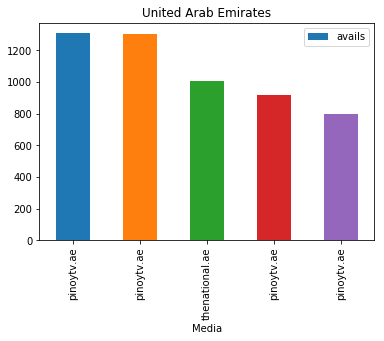

In [21]:
country_name = np.random.choice(list(df.keys()))
source = df[country_name].set_index('Media')
source.head()
source.plot(y='avails', kind='bar', title=country_name)

In [22]:
df['Georgia']

,Media,avails,values,cost,country
51445,myspace.ge,10814,NaN,12.5,Georgia
40423,newposts.ge,1344,NaN,11.5,Georgia
45160,intermedia.ge,1150,NaN,11.0,Georgia


In [23]:
sns.distplot(data['avails'], bins=10)

NameError: name 'sns' is not defined

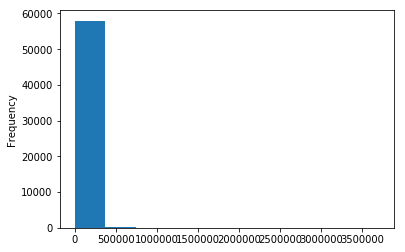

In [18]:
data.avails.plot(kind='hist')

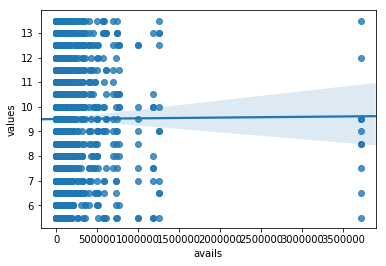

In [19]:
sns.regplot(x='avails', y='values', data=data)

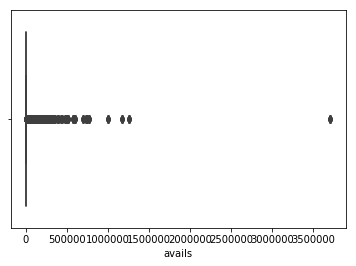

In [20]:
sns.boxplot(x='avails', data=data)

In [21]:
data.groupby('Media')['avails'].sum().sort_values(ascending=False).head(10)

Media
hollywood.com            3821700
honeywell.com            3727464
cakecentral.com          3725827
beardoholic.com          3716302
kerrydalestreet.co.uk    3709838
info.cz                  3709835
woodlanddirect.com       3709625
housewifehowtos.com      3709477
beyondmenu.com           3708744
gmatclub.com             3708744
Name: avails, dtype: int64

In [22]:
df_media = data.groupby(by='Media', as_index=False)['avails'].sum()
df_media.head()

,Media,avails
0,000webhostapp.com,2009
1,007james.com,2634
2,0123movies.com,17013
3,01net.com,9419
4,0800-horoscope.com,2805


/home/eugene/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


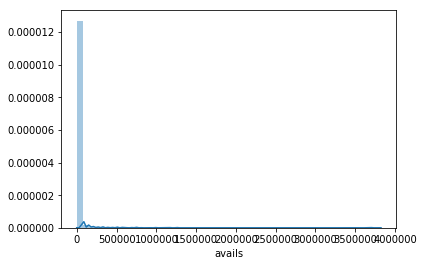

In [23]:
sns.distplot(df_media['avails'])

In [24]:
df_country = data.groupby(by='country', as_index=False)['avails'].sum()
df_country.head()

,country,avails
0,Albania,31505
1,American Samoa,771
2,Antigua and Barbuda,34341
3,Argentina,661986
4,Armenia,56400


In [25]:
df_country.sort_values(by='avails', ascending=False)

,country,avails
131,Worldwide,420252337
125,United Kingdom,8872076
29,Czech Republic,3818475
121,Tuvalu,3698193
13,Brazil,3623951
96,Russian Federation,2783049
56,Japan,2365108
38,France,2024576
24,Colombia,1881843
126,United States,1785931


/home/eugene/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


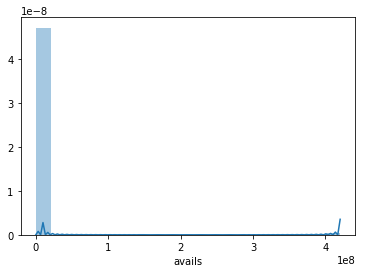

In [26]:
sns.distplot(df_country['avails'], bins=20)

In [27]:
df_media.sort_values(by='avails', ascending=False).head(5)

,Media,avails
11914,hollywood.com,3821700
12008,honeywell.com,3727464
3885,cakecentral.com,3725827
2604,beardoholic.com,3716302
13975,kerrydalestreet.co.uk,3709838


**Используя ключевые слова для каждой категории выявить по названию по 10 доменов для соответствующих категорий (Health & Fitness, Sports, Arts & Entertainment, Travel, Automotive, Style & Fashion).**

In [28]:
data['category'] = ""
data.head()

,Media,avails,values,country,category
0,yahoo.com,4603,6.5,Worldwide,
1,yahoo.com,881,12.0,Worldwide,
2,cmt.com,862,10.0,Worldwide,
3,worldofsolitaire.com,858,11.5,Worldwide,
4,copykat.com,1621,7.0,Worldwide,


In [29]:
for i in data.index:
    name = data.loc[i, 'Media'].split('.')[0]
    if 'health' in name or 'fitness' in name:
        data.at[i, 'category'] = 'Health & Fitness'
    elif 'sports' in name:
        data.at[i, 'category'] = 'Sports'
    elif 'arts' in name or 'entertainment' in name:
        data.at[i, 'category'] = 'Arts & Entertainment'
    elif 'travel' in name:
        data.at[i, 'category'] = 'Travel'
    elif 'automotive' in name:
        data.at[i, 'category'] = 'Automotive'
    elif 'style' in name or 'fashion' in name:
        data.at[i, 'category'] = 'Style & Fashion'

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58159 entries, 0 to 58158
Data columns (total 5 columns):
Media       58159 non-null object
avails      58159 non-null int64
values      58159 non-null float64
country     58159 non-null object
category    58159 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


In [31]:
data['category'].unique()

array(['', 'Health & Fitness', 'Sports', 'Arts & Entertainment',
       'Style & Fashion', 'Travel', 'Automotive'], dtype=object)

In [32]:
data['category'].value_counts()

                        56902
Sports                    404
Health & Fitness          403
Style & Fashion           193
Arts & Entertainment      151
Travel                    105
Automotive                  1
Name: category, dtype: int64

**Посчитать средневзвешенную стоимость по каждой категории.**

In [33]:
data_cat = data[data.category != ""]

In [48]:
data_cat['weights'] = ""
wt = data_cat['values'].value_counts(normalize=True).to_dict()
for i in data_cat.index:
    data_cat.at[i, 'weights'] = wt[data_cat.loc[i, 'values']]

/home/eugene/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
data_cat.head()

,Media,avails,values,country,category,weights
53,healthcentral.com,874,12.5,Worldwide,Health & Fitness,0.0517104
57,nbcsports.com,1968,13.0,Worldwide,Sports,0.0604614
115,stockcharts.com,1431,8.5,Worldwide,Arts & Entertainment,0.0652347
119,totalprosports.com,1340,9.0,Worldwide,Sports,0.0588703
120,entertainmentlove.com,31553,11.5,Worldwide,Arts & Entertainment,0.0684169


In [55]:
data_cat.groupby(by='category', as_index=False)['values'].mean()

,category,values
0,Arts & Entertainment,9.556291
1,Automotive,10.500000
2,Health & Fitness,9.504963
3,Sports,9.384901
4,Style & Fashion,9.323834
5,Travel,9.380952


**Построить инфографику по полученным данным.**

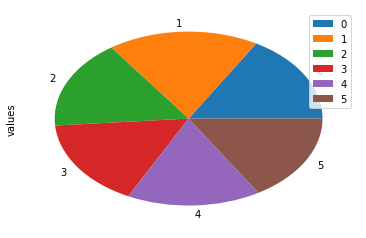

In [42]:
data_cat.groupby(by='category', as_index=False)['values'].mean().plot(y='values', kind='pie')